In [2]:
# code to import sql database
from databaseconfig import config

from sqlalchemy import create_engine
engine = create_engine(config)
connection = engine.connect()

In [3]:
# import dependences
import pandas as pd
import matplotlib as plt

In [4]:
# create the sql query
SQL_Query = pd.read_sql_query(
'''SELECT salaries.emp_no, titles.title, salaries.salary
FROM salaries
JOIN employees
ON employees.emp_no = salaries.emp_no
JOIN titles
ON employees.emp_title_id = titles.title_id;''', connection)

In [5]:
# import the query into a pandas dataframe
query_df = pd.DataFrame(SQL_Query, columns=['emp_no', 'title', 'salary'])
query_df = query_df.rename(columns = {'emp_no': 'employee_num', 
                                      'title' : 'job_title', 
                                      'salary' : 'employee_salary'})
query_df

,employee_num,job_title,employee_salary
0,57444,Engineer,48973
1,13616,Senior Engineer,40000
2,240129,Technique Leader,43548
3,427958,Staff,63377
4,35916,Senior Engineer,40000
...,...,...,...
300019,222402,Staff,40000
300020,70921,Technique Leader,40000
300021,275129,Senior Engineer,59703
300022,202478,Senior Engineer,48038


Text(0, 0.5, 'Frequency')

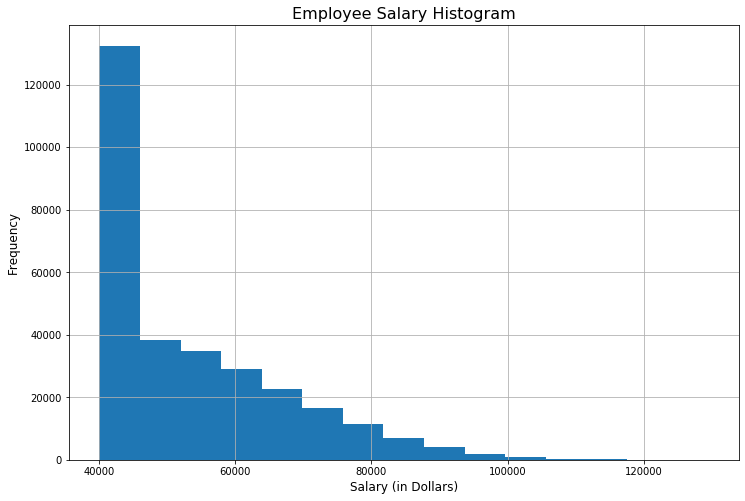

In [6]:
# create a histogram to visualize common employee salaries
query_df.hist(column = 'employee_salary', bins = 15, figsize = (12,8))
plt.pyplot.title("Employee Salary Histogram", fontsize = 16)
plt.pyplot.xlabel("Salary (in Dollars)", fontsize = 12)
plt.pyplot.ylabel("Frequency", fontsize = 12)

In [7]:
# create a bar chart of avg employee salary by title
grouped_jobs = query_df.groupby('job_title')
avg_salaries = grouped_jobs['employee_salary'].mean()
avg_salaries

job_title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: employee_salary, dtype: float64

Text(0.5, 0, 'Job Title')

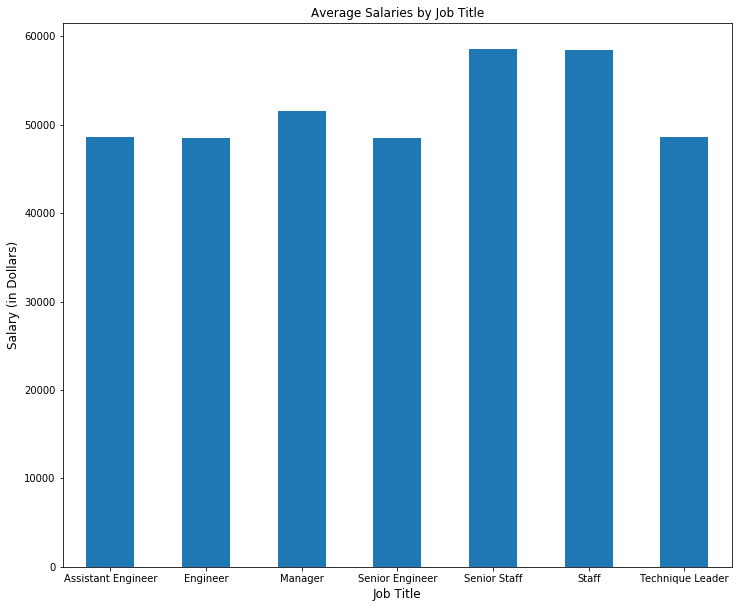

In [8]:
avg_salaries.plot(kind = 'bar', title = 'Average Salaries by Job Title', figsize = (12,10), rot = 0)
plt.pyplot.ylabel("Salary (in Dollars)", fontsize = 12)
plt.pyplot.xlabel("Job Title", fontsize = 12)

In [9]:
# my employee number is 499942, what's my salary
my_sal = query_df.loc[query_df.employee_num == 499942]
my_sal

,employee_num,job_title,employee_salary
42305,499942,Technique Leader,40000


My salary is only \\$40000, which is among the lowest salaries in the company. Joy.